In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import itertools
from sklearn import metrics

In [3]:
df = pd.read_csv('news (1).csv',index_col=None)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
x= df["text"]
y= df["label"]

In [7]:
x_train ,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.33,random_state=53)

In [8]:
x_train

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
662     —Debby Borza stood before a wall of photos of ...
3261    Presumptive Republican nominee Donald Trump ha...
5883    December's job growth numbers are in, and they...
2933    In a wide-ranging discussion, Trump also said ...
797     Top officials of the Cruz campaign are convinc...
Name: text, Length: 4244, dtype: object

In [10]:
# convert to number
tfidf = TfidfVectorizer(stop_words='english')
x_train = tfidf.fit_transform(x_train)
x_test= tfidf.transform(x_test)
print(x_train)

  (1, 36831)	0.10772488937433063
  (1, 47506)	0.1453906087746004
  (1, 38823)	0.06048803110658641
  (1, 25684)	0.10304209221897535
  (1, 21568)	0.10079209195663975
  (1, 36087)	0.1264867985438989
  (1, 16814)	0.10404977746548134
  (1, 49203)	0.16727408617843761
  (1, 25686)	0.13550453594288978
  (1, 15927)	0.4973826512693339
  (1, 29531)	0.1454406205718244
  (1, 8399)	0.08729542880625331
  (1, 42534)	0.06081715886809214
  (1, 21881)	0.21271688045815967
  (1, 35256)	0.12628385718450852
  (1, 35783)	0.3090269081882796
  (1, 51896)	0.11596517664605863
  (1, 44520)	0.4973826512693339
  (1, 15924)	0.3479045460649077
  (1, 50628)	0.061296988343109565
  (1, 54177)	0.1378262914471113
  (1, 12105)	0.1500806646147686
  (1, 42470)	0.07711040274149523
  (2, 9445)	0.22180388050235564
  (2, 8779)	0.19767342113068423
  :	:
  (4243, 30464)	0.032161542218569955
  (4243, 35836)	0.05588497635835917
  (4243, 48084)	0.032785339176678384
  (4243, 22146)	0.027343369111012244
  (4243, 9042)	0.0580186579694780

In [12]:
len(tfidf.get_feature_names_out())

56922

In [13]:
print(x_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
clf = MultinomialNB()
clf.fit(x_train,y_train)
# predict on test data
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %0.3f"% acc)



Accuracy : 0.857


              precision    recall  f1-score   support

        FAKE       0.96      0.73      0.83      1008
        REAL       0.80      0.97      0.88      1083

    accuracy                           0.86      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.88      0.86      0.85      2091

[[ 739  269]
 [  31 1052]]


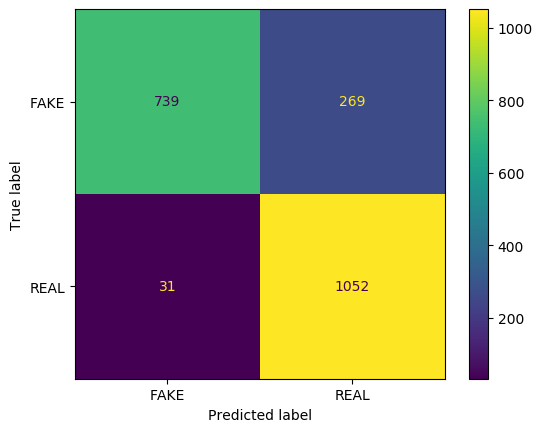

In [18]:
clf_rep = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(clf_rep)
print(cm)
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [19]:
# predictions
df["text"][1]

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to come home” ht

In [20]:
x_train[[3]]

<1x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [21]:
clf.predict(x_train[[5]])

array(['REAL'], dtype='<U4')